## Python | ARIMA Model for Time Series Forecasting

Link: https://www.geeksforgeeks.org/python-arima-model-for-time-series-forecasting/




In [8]:
# Importing required libraries 
import warnings
import itertools
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose 
warnings.filterwarnings("ignore")
import seaborn as sns
#sns.set_style('whitegrid')
sns.set(style="darkgrid")
%matplotlib inline
#plt.style.use('tableau-colorblind10')
plt.style.use('tableau-colorblind10')
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 12
matplotlib.rcParams['xtick.labelsize'] = 10
matplotlib.rcParams['ytick.labelsize'] = 10
matplotlib.rcParams['text.color'] = 'k'
plt.rcParams.update({'figure.figsize':(9,6), 'figure.dpi':120})

In [9]:
import os
#os.chdir("/Users/kkattidis/Documents/GitHub repos/python-data-analysis")
os.getcwd()

'/Users/kkattidis/Documents/GitHub repos/python-data-analysis'

In [10]:
import sys
print(sys.executable)

/Users/kkattidis/opt/anaconda3/bin/python


In [11]:
import pandas as pd 
# Read the AirPassengers dataset 
airline = pd.read_csv('./Data/AirPassengers.csv', 
                       index_col ='Month', 
                       parse_dates = True) 
  
# Print the first five rows of the dataset 
airline.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


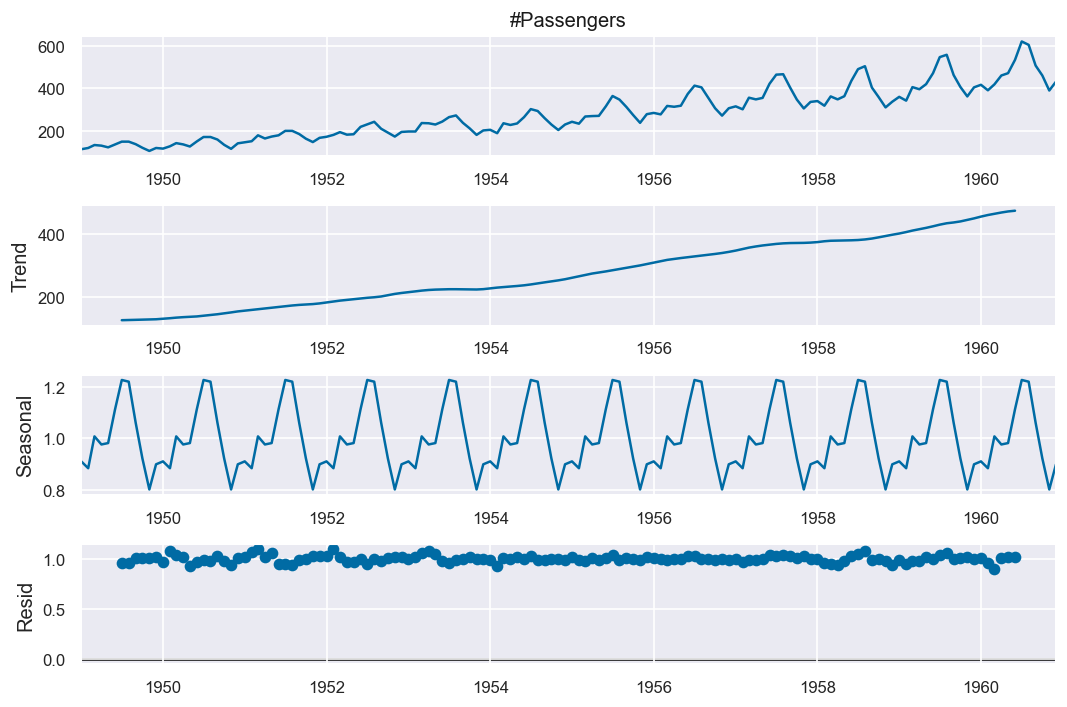

In [12]:
  
# ETS Decomposition 
result = seasonal_decompose(airline['#Passengers'],  
                            model ='multiplicative') 
# ETS plot  
chart = result.plot()

In [18]:
a

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [19]:
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# load data
series = airline
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# difference data
	months_in_year = 12
	diff = difference(history, months_in_year)
	# predict
	model = ARIMA(diff, order=(1,1,1))
	model_fit = model.fit(trend='nc', disp=0)
	yhat = model_fit.forecast()[0]
	yhat = inverse_difference(history, yhat, months_in_year)
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
	print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

>Predicted=232.404, Expected=242
>Predicted=221.336, Expected=233
>Predicted=279.973, Expected=267
>Predicted=256.453, Expected=269
>Predicted=272.398, Expected=270
>Predicted=303.246, Expected=315
>Predicted=347.806, Expected=364
>Predicted=355.372, Expected=347
>Predicted=314.549, Expected=312
>Predicted=281.417, Expected=274
>Predicted=249.932, Expected=237
>Predicted=264.128, Expected=278
>Predicted=287.307, Expected=284
>Predicted=278.358, Expected=277
>Predicted=308.929, Expected=317
>Predicted=318.691, Expected=313
>Predicted=315.472, Expected=318
>Predicted=361.466, Expected=374
>Predicted=421.387, Expected=413
>Predicted=398.945, Expected=405
>Predicted=366.705, Expected=355
>Predicted=322.047, Expected=306
>Predicted=269.585, Expected=271
>Predicted=311.297, Expected=306
>Predicted=313.624, Expected=315
>Predicted=306.721, Expected=301
>Predicted=343.078, Expected=356
>Predicted=347.642, Expected=348
>Predicted=355.588, Expected=355
>Predicted=409.559, Expected=422
>Predicted

In [20]:
import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	X = X.astype('float32')
	train_size = int(len(X) * 0.50)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		# difference data
		months_in_year = 12
		diff = difference(history, months_in_year)
		model = ARIMA(diff, order=arima_order)
		model_fit = model.fit(trend='nc', disp=0)
		yhat = model_fit.forecast()[0]
		yhat = inverse_difference(history, yhat, months_in_year)
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	mse = mean_squared_error(test, predictions)
	rmse = sqrt(mse)
	return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s RMSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

# load dataset
series = read_csv('./Data/dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(0, 7)
d_values = range(0, 3)
q_values = range(0, 7)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 1) RMSE=939.464
ARIMA(0, 0, 2) RMSE=962.289
ARIMA(0, 0, 3) RMSE=944.237
ARIMA(0, 0, 4) RMSE=958.791
ARIMA(0, 0, 5) RMSE=986.835
ARIMA(0, 0, 6) RMSE=1087.010
ARIMA(0, 1, 1) RMSE=958.301
ARIMA(0, 1, 2) RMSE=959.950
ARIMA(0, 1, 3) RMSE=975.973
ARIMA(0, 1, 4) RMSE=986.335
ARIMA(0, 1, 5) RMSE=1011.701
ARIMA(0, 1, 6) RMSE=1025.446
ARIMA(0, 2, 1) RMSE=1146.987
ARIMA(0, 2, 2) RMSE=987.044
ARIMA(0, 2, 3) RMSE=997.084
ARIMA(1, 0, 0) RMSE=944.449
ARIMA(1, 1, 0) RMSE=1070.204
ARIMA(1, 1, 1) RMSE=956.942
ARIMA(1, 2, 0) RMSE=1555.858
ARIMA(2, 0, 0) RMSE=955.134
ARIMA(2, 0, 1) RMSE=948.671
ARIMA(2, 1, 0) RMSE=1030.467
ARIMA(2, 1, 1) RMSE=980.953
ARIMA(2, 2, 0) RMSE=1346.598
ARIMA(2, 2, 1) RMSE=1039.635
ARIMA(3, 0, 0) RMSE=959.165
ARIMA(3, 1, 0) RMSE=1028.226
ARIMA(3, 1, 1) RMSE=979.939
ARIMA(3, 2, 0) RMSE=1244.846
ARIMA(4, 0, 0) RMSE=968.411
ARIMA(4, 0, 1) RMSE=910.318
ARIMA(4, 1, 0) RMSE=1046.524
ARIMA(4, 1, 1) RMSE=1006.258
ARIMA(4, 1, 2) RMSE=993.653
ARIMA(4, 2, 0) RMSE=1227.556
ARIMA(

In [15]:
# To install the library 
#pip install pmdarima 
  
# Import the library 
from pmdarima import auto_arima 
import six 
  
# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 
  
# Fit auto_arima function to AirPassengers dataset 
stepwise_fit = auto_arima(airline['#Passengers'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 
  
# To print the summary 
stepwise_fit.summary() 

ImportError: cannot import name 'six' from 'sklearn.externals' (/Users/kkattidis/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/__init__.py)

In [22]:
# Split data into train / test sets 
train = airline.iloc[:len(airline)-12] 
test = airline.iloc[len(airline)-12:] # set one year(12 months) for testing 
  
# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(train['#Passengers'],  
                order = (0, 1, 1),  
                seasonal_order =(2, 1, 1, 12)) 
  
result = model.fit() 
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        #Passengers   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -443.015
Date:                            Sat, 19 Sep 2020   AIC                            896.030
Time:                                    11:57:04   BIC                            909.925
Sample:                                01-01-1949   HQIC                           901.672
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2971      0.076     -3.890      0.000      -0.447      -0.147
ar.S.L12       0.7113      0.234      3.041      0.002       0.253       1.170
ar.S.L24       0.2877      0.100      2.865      0.004       0.091       0.485
ma.S.L12      -0.9785      2.052     -0.477      0.634      -5.001       3.044
sigma2        88.3866    162.379      0.544      0.586    -229.870     406.643
===================================================================================
Ljung-Box (Q):                       38.23   Jarque-Bera (JB):                 0.00
Prob(Q):                              0.55   Prob(JB):                         1.00
Heteroskedasticity (H):               1.62   Skew:                            -0.00
Prob(H) (two-sided):                  0.13   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Month'>

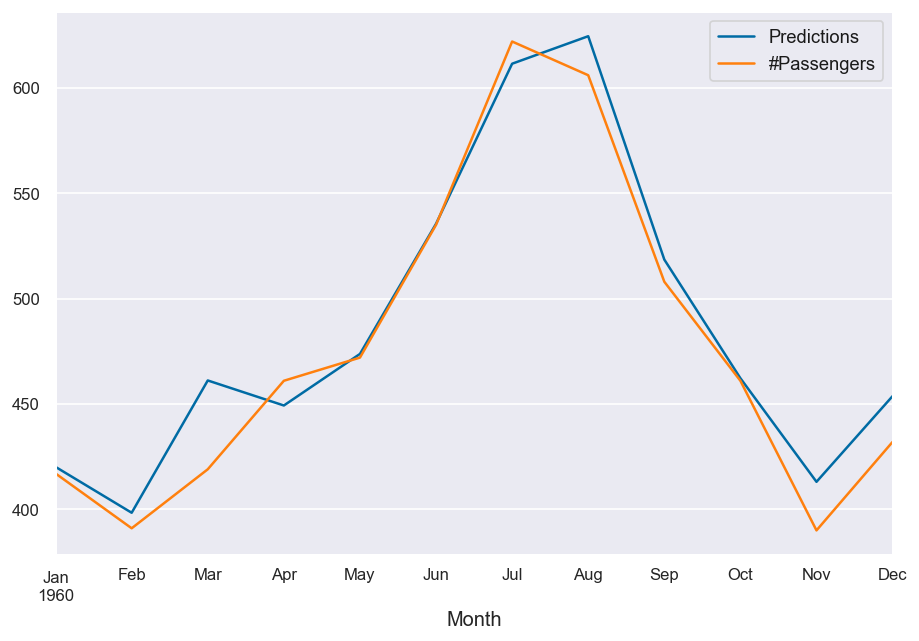

In [24]:
start = len(train) 
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set 
predictions = result.predict(start, end, 
                             typ = 'levels').rename("Predictions") 
  
# plot predictions and actual values 
predictions.plot(legend = True) 
test['#Passengers'].plot(legend = True) 